<a href="https://colab.research.google.com/github/Salitre97/ECGR-4105-Intro_to_ML/blob/main/Homework_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.optim as optim

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Problem 1

In [2]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]   # Temperature in Cesius
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]  # measurement
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

In [3]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_indices, val_indices

(tensor([ 7,  8,  9,  1,  2, 10,  5,  6,  3]), tensor([0, 4]))

In [4]:
train_t_u = t_u[train_indices]
train_t_c = t_c[train_indices]

val_t_u = t_u[val_indices]
val_t_c = t_c[val_indices]

train_t_un = 0.1 * train_t_u
val_t_un = 0.1 * val_t_u

In [5]:

# Define non-linear model
def nonlinear_model(t_u, w1, w2, b):
    return w2*t_u ** 2 + w1*t_u + b

def linear_model(t_u, w, b):
    return w*t_u + b

# loss function
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

# Training loop for non-linear model
def nonlinear_train(n_epochs, optimizer, params, train_t_u, val_t_u, train_t_c, val_t_c):
    for epoch in range(1, n_epochs + 1):
        train_t_p = nonlinear_model(train_t_u, *params)
        train_loss = loss_fn(train_t_p, train_t_c)

        val_t_p = nonlinear_model(val_t_u, *params)
        val_loss = loss_fn(train_t_p, train_t_c)

        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

        if epoch % 500 == 0:
            print(f"Epoch {epoch}, Training loss {train_loss.item():.4f}," f" validation loss {val_loss.item():.4f}")

    return params
    print('\n')
# Training loop for linear model
def linear_train(n_epochs, optimizer, params, train_t_u, val_t_u, train_t_c, val_t_c):
    for epoch in range(1, n_epochs + 1):
        train_t_p = linear_model(train_t_u, * params)
        train_loss = loss_fn(train_t_p, train_t_c)

        val_t_p = linear_model(val_t_u, *params)
        val_loss = loss_fn(val_t_p, val_t_c)

        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

        if epoch <= 3 or epoch % 500 == 0:
            print(f"Epoch {epoch}, Training loss {train_loss.item():.4f}," f" Validation loss {val_loss.item():.4f}")
    return params



In [6]:
# Different learning rates and optimizers
learning_rates = [0.1, 0.01, 0.001, 0.0001]
print('Stochastic Gradient Descent (SGD):\n')
for lr in learning_rates:
  params = torch.tensor([1.0, 1.0, 0.0],  requires_grad=True)
  optimizer = optim.SGD([params], lr=lr)
  print(f'Learning rate: {lr}\n')
  nonlinear_train(n_epochs=5000, optimizer=optimizer, params=params, train_t_u=train_t_un, val_t_u=val_t_un, train_t_c=train_t_c, val_t_c=val_t_c)

print('Adam Optimizer:\n')
for lr in learning_rates:
  params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
  optimizer = optim.Adam([params], lr=lr)
  print(f'Learning rate: {lr}\n')
  nonlinear_train(n_epochs=5000, optimizer=optimizer, params=params, train_t_u=train_t_un, val_t_u=val_t_un, train_t_c=train_t_c, val_t_c=val_t_c)


Stochastic Gradient Descent (SGD):

Learning rate: 0.1

Epoch 500, Training loss nan, validation loss nan
Epoch 1000, Training loss nan, validation loss nan
Epoch 1500, Training loss nan, validation loss nan
Epoch 2000, Training loss nan, validation loss nan
Epoch 2500, Training loss nan, validation loss nan
Epoch 3000, Training loss nan, validation loss nan
Epoch 3500, Training loss nan, validation loss nan
Epoch 4000, Training loss nan, validation loss nan
Epoch 4500, Training loss nan, validation loss nan
Epoch 5000, Training loss nan, validation loss nan
Learning rate: 0.01

Epoch 500, Training loss nan, validation loss nan
Epoch 1000, Training loss nan, validation loss nan
Epoch 1500, Training loss nan, validation loss nan
Epoch 2000, Training loss nan, validation loss nan
Epoch 2500, Training loss nan, validation loss nan
Epoch 3000, Training loss nan, validation loss nan
Epoch 3500, Training loss nan, validation loss nan
Epoch 4000, Training loss nan, validation loss nan
Epoch 4

Epoch 500, Training loss 2.9426, validation loss 2.9426
Epoch 1000, Training loss 2.5439, validation loss 2.5439
Epoch 1500, Training loss 2.2630, validation loss 2.2630
Epoch 2000, Training loss 2.1304, validation loss 2.1304
Epoch 2500, Training loss 2.0890, validation loss 2.0890
Epoch 3000, Training loss 2.0810, validation loss 2.0810
Epoch 3500, Training loss 2.0802, validation loss 2.0802
Epoch 4000, Training loss 2.0801, validation loss 2.0801
Epoch 4500, Training loss 2.0801, validation loss 2.0801
Epoch 5000, Training loss 2.0801, validation loss 2.0801
Epoch 1, Training loss 93.9718, Validation loss 19.1309
Epoch 2, Training loss 93.9718, Validation loss 19.1309
Epoch 3, Training loss 93.9718, Validation loss 19.1309
Epoch 500, Training loss 93.9718, Validation loss 19.1309
Epoch 1000, Training loss 93.9718, Validation loss 19.1309
Epoch 1500, Training loss 93.9718, Validation loss 19.1309
Epoch 2000, Training loss 93.9718, Validation loss 19.1309
Epoch 2500, Training loss 93

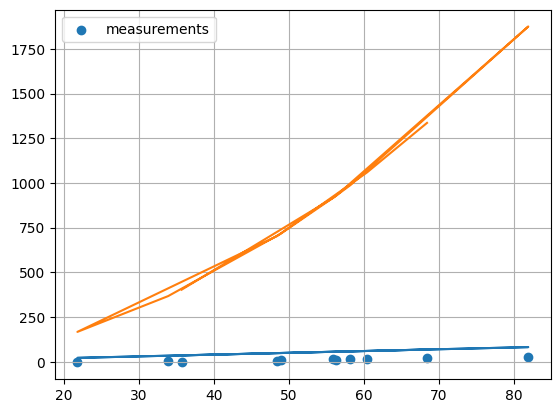

In [7]:
# Best nonlinear model vs linear model (in class from textbook)
nonlinear_params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
nonlinear_optimizer = optim.Adam([nonlinear_params], lr=0.1)
linear_params = torch.tensor([1.0, 0.0], requires_grad=True)
linear_optimizer = optim.Adam([nonlinear_params], lr=0.01)

nonlinear = nonlinear_train(n_epochs=5000, optimizer=nonlinear_optimizer, params=nonlinear_params, train_t_u=train_t_un, val_t_u=val_t_un, train_t_c=train_t_c, val_t_c=val_t_c)
linear = linear_train(n_epochs=5000, optimizer=linear_optimizer, params=linear_params, train_t_u=train_t_un, val_t_u=val_t_un, train_t_c=train_t_c, val_t_c=val_t_c )

t_p_linear = linear_model(t_u, *linear).detach().numpy()
t_p_nonlinear = nonlinear_model(t_u, *nonlinear).detach().numpy()

plt.scatter(t_u, t_c, label='measurements')
plt.plot(t_u, t_p_linear)
plt.plot(t_u, t_p_nonlinear)
plt.legend()
plt.grid()
plt.show()


#Problem 2

In [8]:
file_path = '/content/drive/MyDrive/ML-4105/Housing.csv'
housing = pd.DataFrame(pd.read_csv(file_path))
housing.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [12]:
# model for 6 parameters
def linear_model1(x, w5, w4, w3, w2, w1, b):
    return torch.matmul(x, params[:-1].double()) + params[-1].double()

# model for 11 parameters
def linear_model2(x, w10, w9, w8, w7, w6, w5, w4, w3, w2, w1, b):
    return torch.matmul(x, params[:-1].double()) + params[-1].double()

def linear_train1(epochs, optimizer, params, train_x, val_x, train_y, val_y):
  train_losses = []
  val_losses = []

  for epoch in range(1, epochs+1):
    train_p = linear_model1(train_x, *params)
    train_loss = loss_fn(train_p, train_y)

    val_p = linear_model1(val_x, *params)
    val_loss = loss_fn(val_p, val_y)

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    train_losses.append(train_loss)
    val_losses.append(val_loss)

    if epoch % 500 == 0:
      print(f'Epochs: {epoch}, \tTraining Loss: {train_loss:.6f}, \tValidation Loss: {val_loss:.6f}\n')

  return params, train_losses, val_losses

# training loop for 11 parameters
def linear_train2(epochs, optimizer, params, train_x, val_x, train_y, val_y):
  train_losses = []
  val_losses = []

  for epoch in range(1, epochs+1):
    train_p = linear_model2(train_x, *params)
    train_loss = loss_fn(train_p, train_y)

    val_p = linear_model2(val_x1, *params)
    val_loss = loss_fn(val_p, val_y)

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    train_losses.append(train_loss)
    val_losses.append(val_loss)

    if epoch % 500 == 0:
      print(f'Epochs: {epoch}, \tTraining Loss: {train_loss:.6f}, \tValidation Loss: {val_loss:.6f}\n')

  return params, train_losses, val_losses

In [13]:
features = ["area", "bedrooms", "bathrooms", "stories", "parking"]

x = housing[features].values
y = housing['price'].values

sc = StandardScaler()
x_sc = sc.fit_transform(x)

x = torch.tensor(x_sc)
y = torch.tensor(y)

n_samples = x.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_x = x[train_indices]
train_y = y[train_indices]

val_x = x[val_indices]
val_y = y[val_indices]

train_indices, val_indices
train_x.shape



torch.Size([436, 5])

In [14]:
# Adam with different learning rates
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.Adam([params], lr=0.1)
print(f'Learning rate: 0.1\n')
trained_params, train_losses, val_losses = linear_train1(
    5000, optimizer, params, train_x, val_x, train_y, val_y
)

params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.Adam([params], lr=0.01)
print(f'Learning rate: 0.01\n')
trained_params1, train_losses1, val_losses1 = linear_train1(
    5000, optimizer, params, train_x, val_x, train_y, val_y
)

params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.Adam([params], lr=0.001)
print(f'Learning rate: 0.001\n')
trained_params2, train_losses2, val_losses2 = linear_train1(
    5000, optimizer, params, train_x, val_x, train_y, val_y
)

params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.Adam([params], lr=0.0001)
print(f'Learning rate: 0.0001\n')
trained_params3, train_losses3, val_losses3 = linear_train1(
    5000, optimizer, params, train_x, val_x, train_y, val_y
)

# SGD with different learning rates
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.SGD([params], lr=0.1)
print(f'Learning rate: 0.1\n')
trained_params4, train_losses4, val_losses4 = linear_train1(
    5000, optimizer, params, train_x, val_x, train_y, val_y
)
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.SGD([params], lr=0.1)
print(f'Learning rate: 0.01\n')
trained_params5, train_losses5, val_losses5 = linear_train1(
    5000, optimizer, params, train_x, val_x, train_y, val_y
)
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.SGD([params], lr=0.1)
print(f'Learning rate: 0.001\n')
trained_params6, train_losses6, val_losses6 = linear_train1(
    5000, optimizer, params, train_x, val_x, train_y, val_y
)
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.SGD([params], lr=0.1)
print(f'Learning rate: 0.0001\n')
trained_params7, train_losses7, val_losses7 = linear_train1(
    5000, optimizer, params, train_x, val_x, train_y, val_y
)

Learning rate: 0.1

Epochs: 500, 	Training Loss: 25806522499100.687500, 	Validation Loss: 27838578749520.531250

Epochs: 1000, 	Training Loss: 25805692067174.476562, 	Validation Loss: 27837438639488.984375

Epochs: 1500, 	Training Loss: 25804861688460.480469, 	Validation Loss: 27836298609068.179688

Epochs: 2000, 	Training Loss: 25804031419350.515625, 	Validation Loss: 27835158713166.046875

Epochs: 2500, 	Training Loss: 25803201210056.253906, 	Validation Loss: 27834018893394.734375

Epochs: 3000, 	Training Loss: 25802371007005.265625, 	Validation Loss: 27832879100622.703125

Epochs: 3500, 	Training Loss: 25801540846661.128906, 	Validation Loss: 27831739363044.652344

Epochs: 4000, 	Training Loss: 25800710736450.980469, 	Validation Loss: 27830599687498.980469

Epochs: 4500, 	Training Loss: 25799880676374.820312, 	Validation Loss: 27829460073985.695312

Epochs: 5000, 	Training Loss: 25799050666432.656250, 	Validation Loss: 27828320522504.808594

Learning rate: 0.01

Epochs: 500, 	Traini

In [15]:
# List of variables to map
varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating','airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
  return x.map({'yes': 1, 'no': 0})

# Applying the function to the list
housing[varlist] = housing[varlist].apply(binary_map)
housing.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [17]:
feature_list = ['area', 'bedrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
x1 = housing[feature_list].values
y1 = housing['price'].values.reshape(-1,1)

sc = StandardScaler()
x1_sc = sc.fit_transform(x1)

x1 = torch.tensor(x1_sc)
y1 = torch.tensor(y1)

n_samples = x1.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_x1 = x1[train_indices]
train_y1 = y1[train_indices]

val_x1 = x1[val_indices]
val_y1 = y1[val_indices]

train_x1.shape

torch.Size([436, 10])

In [ ]:
# Adam with different learning rates
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.Adam([params], lr=0.1)
print(f'Learning rate: 0.1\n')
trained_params8, train_losses8, val_losses8 = linear_train2(
    5000, optimizer, params, train_x1, val_x1, train_y1, val_y1
)

params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.Adam([params], lr=0.01)
print(f'Learning rate: 0.01\n')
trained_params9, train_losses9, val_losses9 = linear_train2(
    5000, optimizer, params, train_x1, val_x1, train_y1, val_y1
)

params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.Adam([params], lr=0.001)
print(f'Learning rate: 0.001\n')
trained_params10, train_losses10, val_losses10 = linear_train2(
    5000, optimizer, params, train_x1, val_x1, train_y1, val_y1
)

params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.Adam([params], lr=0.0001)
print(f'Learning rate: 0.0001\n')
trained_params11, train_losses11, val_losses11 = linear_train2(
    5000, optimizer, params, train_x1, val_x1, train_y1, val_y1
)

# SGD with different learning rates
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.SGD([params], lr=0.1)
print(f'Learning rate: 0.1\n')
trained_params12, train_losses12, val_losses12 = linear_train2(
    5000, optimizer, params, train_x1, val_x1, train_y1, val_y1
)
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.SGD([params], lr=0.1)
print(f'Learning rate: 0.01\n')
trained_params13, train_losses13, val_losses13 = linear_train2(
    5000, optimizer, params, train_x1, val_x1, train_y1, val_y1
)
params = torch.tensor([11.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.SGD([params], lr=0.1)
print(f'Learning rate: 0.001\n')
trained_params14, train_losses14, val_losses14 = linear_train2(
    5000, optimizer, params, train_x1, val_x1, train_y1, val_y1
)
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.SGD([params], lr=0.1)
print(f'Learning rate: 0.0001\n')
trained_params15, train_losses15, val_losses15 = linear_train2(
    5000, optimizer, params, train_x1, val_x1, train_y1, val_y1
)

Learning rate: 0.1

Epochs: 500, 	Training Loss: 25614440137052.468750, 	Validation Loss: 28609032772231.218750

Epochs: 1000, 	Training Loss: 25613913753110.597656, 	Validation Loss: 28608763481432.417969

Epochs: 1500, 	Training Loss: 25613387422256.007812, 	Validation Loss: 28608494174316.542969

Epochs: 2000, 	Training Loss: 25612861186158.277344, 	Validation Loss: 28608224911480.996094

Epochs: 2500, 	Training Loss: 25612335002931.140625, 	Validation Loss: 28607955656172.113281

Epochs: 3000, 	Training Loss: 25611808804675.085938, 	Validation Loss: 28607686362091.164062

Epochs: 3500, 	Training Loss: 25611282649015.242188, 	Validation Loss: 28607417071604.484375

Epochs: 4000, 	Training Loss: 25610756540907.488281, 	Validation Loss: 28607147810623.449219

Epochs: 4500, 	Training Loss: 25610230481217.714844, 	Validation Loss: 28606878575463.082031

Epochs: 5000, 	Training Loss: 25609704467399.812500, 	Validation Loss: 28606609376731.328125

Learning rate: 0.01

Epochs: 500, 	Traini